# Reference Links

* Kaggle: https://www.kaggle.com/c/bigquery-geotab-intersection-congestion

* Kaggle 1st Place Solution: https://www.kaggle.com/joatom/bigquery-geotab-bqml

* Kaggle 2nd Place Solution: https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/discussion/122314

* Additional data: https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/discussion/108630

* Geospatial Analysis Course: https://www.kaggle.com/learn/geospatial-analysis

**Papers**
* A Review of Traffic Congestion Prediction Using Artificial Intelligence
: https://www.hindawi.com/journals/jat/2021/8878011/

* Traffic congestion prediction based on Estimated Time of Arrival:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0238200

#Data Set Description

The data consists of aggregated trip logging metrics from commercial vehicles, such as semi-trucks. The data have been grouped by intersection, month, hour of day, direction driven through the intersection, and whether the day was on a weekend or not.

For each grouping in the test set, you need to make predictions for three different quantiles of two different metrics covering how long it took the group of vehicles to drive through the intersection. Specifically, the 20th, 50th, and 80th percentiles for the total time stopped at an intersection and the distance between the intersection and the first place a vehicle stopped while waiting. You can think of your goal as summarizing the distribution of wait times and stop distances at each intersection.

Each of those six predictions goes on a new row in the submission file. Read the submission TargetId fields, such as 1_1, as the first number being the RowId and the second being the metric id. You can unpack the submission metric id codes with submission_metric_map.json.

The training set includes an optional additional output metric (TimeFromFirstStop) in case you find that useful for building your models. It was only excluded from the test set to limit the number of predictions that must be made.

# Importing Data Set and Evironment Prep

In [ ]:
#upload kaggle authorization credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dergrosseaffe","key":"9617fd8ce8849e09f6f6b8c4fce17345"}'}

In [ ]:
 ! pip install kaggle==1.5.6
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 4.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp37-none-any.whl size=72858 sha256=6286d443feacce69b4670d7201c14d77ffb16f1b2b95ffe5fba98f4bba35df29
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! mkdir dataset

In [ ]:
! kaggle competitions download -c bigquery-geotab-intersection-congestion -p /content/dataset

 87% 47.0M/54.0M [00:00<00:00, 94.8MB/s]
100% 54.0M/54.0M [00:00<00:00, 124MB/s] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip /content/dataset/bigquery-geotab-intersection-congestion.zip

Archive:  /content/dataset/bigquery-geotab-intersection-congestion.zip
  inflating: BigQuery-Dataset-Access.md  
  inflating: sample_submission.csv   
  inflating: submission_metric_map   
  inflating: submission_metric_map.json  
  inflating: test.csv                
  inflating: train.csv               


#Exploratory Data Analysis

In [ ]:
! head train.csv

RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
1921357,0,33.791658500000004,-84.4300325,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boulevard Northwest_NW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921358,0,33.791658500000004,-84.4300325,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boulevard Northwest_SE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1921359,0,33.791658500000004,-84.4300325,Marietta Boul

In [ ]:
! tail train.csv

2777734,1990,39.938232,-75.14993,South 4th Street,South 4th Street,S,S,22,0,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
2777735,1990,39.938232,-75.14993,South 4th Street,South 4th Street,S,S,23,0,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
2777736,1990,39.938232,-75.14993,South 4th Street,South 4th Street,S,S,8,1,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
2777737,1990,39.938232,-75.14993,Catharine Street,Catharine Street,W,W,11,1,12,Catharine Street_W_Catharine Street_W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
2777738,1990,39.938232,-75.14993,South 4th Street,South 4th Street,S,S,14,1,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
2777739,1990,39.938232,-75.14993,South 4th Street,C

In [ ]:
! cat train.csv | wc -l 
! cat test.csv | wc -l

856388
1921358


In [ ]:
# Column names
"RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City".split(",")

['RowId',
 'IntersectionId',
 'Latitude',
 'Longitude',
 'EntryStreetName',
 'ExitStreetName',
 'EntryHeading',
 'ExitHeading',
 'Hour',
 'Weekend',
 'Month',
 'Path',
 'TotalTimeStopped_p20',
 'TotalTimeStopped_p40',
 'TotalTimeStopped_p50',
 'TotalTimeStopped_p60',
 'TotalTimeStopped_p80',
 'TimeFromFirstStop_p20',
 'TimeFromFirstStop_p40',
 'TimeFromFirstStop_p50',
 'TimeFromFirstStop_p60',
 'TimeFromFirstStop_p80',
 'DistanceToFirstStop_p20',
 'DistanceToFirstStop_p40',
 'DistanceToFirstStop_p50',
 'DistanceToFirstStop_p60',
 'DistanceToFirstStop_p80',
 'City']

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('./train.csv')#, index_col = 0)

In [ ]:
train_data

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856382,2777739,1990,39.938232,-75.149930,South 4th Street,Catharine Street,S,W,17,1,12,South 4th Street_S_Catharine Street_W,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,75.5,Philadelphia
856383,2777740,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,18,1,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856384,2777741,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,19,1,12,South 4th Street_S_South 4th Street_S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia
856385,2777742,1990,39.938232,-75.149930,Catharine Street,Catharine Street,W,W,20,1,12,Catharine Street_W_Catharine Street_W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Philadelphia


In [ ]:
train_data.groupby(['City']).size()

City
Atlanta         156484
Boston          178617
Chicago         131049
Philadelphia    390237
dtype: int64

In [ ]:
test_data = pd.read_csv('./test.csv')

## Missing Values

In [ ]:
any(train_data.isna())

True

In [ ]:
#function for identfying which columns have missing values
def identify_nan(dataframe):

    result = {}

    for i in dataframe.columns.to_list():

        result.update({i: dataframe[i].isnull().values.any()})

    return result

#variable to store the above function result
identify_columns_nan = identify_nan(train_data)
print(identify_columns_nan)

{'RowId': False, 'IntersectionId': False, 'Latitude': False, 'Longitude': False, 'EntryStreetName': True, 'ExitStreetName': True, 'EntryHeading': False, 'ExitHeading': False, 'Hour': False, 'Weekend': False, 'Month': False, 'Path': False, 'TotalTimeStopped_p20': False, 'TotalTimeStopped_p40': False, 'TotalTimeStopped_p50': False, 'TotalTimeStopped_p60': False, 'TotalTimeStopped_p80': False, 'TimeFromFirstStop_p20': False, 'TimeFromFirstStop_p40': False, 'TimeFromFirstStop_p50': False, 'TimeFromFirstStop_p60': False, 'TimeFromFirstStop_p80': False, 'DistanceToFirstStop_p20': False, 'DistanceToFirstStop_p40': False, 'DistanceToFirstStop_p50': False, 'DistanceToFirstStop_p60': False, 'DistanceToFirstStop_p80': False, 'City': False}


In [ ]:
#which columns have at least one missing value
identify_output_nan = {}

for key, value in identify_columns_nan.items():
    
    if (value == True):

        identify_output_nan[key] = value

print(identify_output_nan)

{'EntryStreetName': True, 'ExitStreetName': True}


In [ ]:
is_NaN = train_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = train_data[row_has_NaN]
print(rows_with_NaN.shape) #how many rows with at least 1 NaN value

(13935, 28)


##Data Types

In [ ]:
train_data.dtypes

RowId                        int64
IntersectionId               int64
Latitude                   float64
Longitude                  float64
EntryStreetName             object
ExitStreetName              object
EntryHeading                object
ExitHeading                 object
Hour                         int64
Weekend                      int64
Month                        int64
Path                        object
TotalTimeStopped_p20       float64
TotalTimeStopped_p40       float64
TotalTimeStopped_p50       float64
TotalTimeStopped_p60       float64
TotalTimeStopped_p80       float64
TimeFromFirstStop_p20      float64
TimeFromFirstStop_p40      float64
TimeFromFirstStop_p50      float64
TimeFromFirstStop_p60      float64
TimeFromFirstStop_p80      float64
DistanceToFirstStop_p20    float64
DistanceToFirstStop_p40    float64
DistanceToFirstStop_p50    float64
DistanceToFirstStop_p60    float64
DistanceToFirstStop_p80    float64
City                        object
dtype: object

# Feature Engineering

In [ ]:
pip install haversine

In [ ]:
df = pd.DataFrame()
dataset = train_data

df['City'] = dataset['City']
df['Latitude'] = dataset['Latitude']
df['Longitude'] = dataset['Longitude']
df['Weekend'] = dataset.apply(lambda x: 1-x['Weekend'], axis=1) # invertemos o valor pro ter correlacao negativa
df.head()

df_test = pd.DataFrame()
dataset_test = test_data
df_test['City'] = dataset_test['City']
df_test['Latitude'] = dataset_test['Latitude']
df_test['Longitude'] = dataset_test['Longitude']
df_test['Weekend'] = dataset_test.apply(lambda x: 1-x['Weekend'], axis=1) # invertemos o valor pro ter correlacao negativa
df_test.head()

,City,Latitude,Longitude,Weekend
0,Atlanta,33.75094,-84.393032,1
1,Atlanta,33.75094,-84.393032,1
2,Atlanta,33.75094,-84.393032,1
3,Atlanta,33.75094,-84.393032,1
4,Atlanta,33.75094,-84.393032,1


##Hora do Rush

In [ ]:
def rush_hour(X):
    hour = X['Hour']
    if (hour >= 8 and hour < 10) or (hour >= 18 and hour < 20):
        return 1
    else:
        return -1

In [ ]:
df['RushHour'] = dataset.apply(rush_hour, axis=1)
df['RushHour']
df_test['RushHour'] = dataset_test.apply(rush_hour, axis=1)

##Horario do Dia

In [ ]:
def group_hour(X):
  hour = X['Hour']
  if hour > 4 and hour <= 8:
    return 'early morning'
  elif hour < 10:
    return 'morning rush'
  elif hour < 12:
    return 'late morning'
  elif hour < 18:
    return 'afternoon'
  elif hour < 20:
    return 'night rush'
  elif hour < 23:
    return 'night'
  else:
    return 'late night'

In [ ]:
from sklearn.preprocessing import OneHotEncoder
hourGrouped = dataset.apply(group_hour, axis=1)
hourOHE = OneHotEncoder().fit_transform(hourGrouped.values.reshape(-1, 1))

df = pd.concat([df, pd.DataFrame(hourOHE.toarray()
                                , index=df.index
                                , columns=['HourOHE1', 'HourOHE2', 'HourOHE3', 'HourOHE4', 'HourOHE5', 'HourOHE6', 'HourOHE7'])], axis=1)
del(hourGrouped)
del(hourOHE)

df.head()

hourGrouped = dataset_test.apply(group_hour, axis=1)
hourOHE = OneHotEncoder().fit_transform(hourGrouped.values.reshape(-1, 1))
df_test = pd.concat([df_test, pd.DataFrame(hourOHE.toarray()
                                , index=df_test.index
                                , columns=['HourOHE1', 'HourOHE2', 'HourOHE3', 'HourOHE4', 'HourOHE5', 'HourOHE6', 'HourOHE7'])], axis=1)
del(hourGrouped)
del(hourOHE)

df_test.head()

,City,Latitude,Longitude,Weekend,RushHour,HourOHE1,HourOHE2,HourOHE3,HourOHE4,HourOHE5,HourOHE6,HourOHE7
0,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
def normalize_coordinate(coord): # truncamos a coordenada para evitar overfitting
    return int(coord*1000)  

def heading_vector(heading):
    (V, H) = (0, 0)
    if 'N' in heading:
        V = 1
    if 'S' in heading:
        V = -1
    if 'W' in heading:
        H = -1
    if 'E' in heading:
        H = 1
    return (V, H)

def heading_direction(X):
    lt, lg, heading = normalize_coordinate(X['Latitude']), normalize_coordinate(X['Longitude']), X['ExitHeading']
    ltv, lgv = heading_vector(heading)
    return (ltv, lgv)

In [ ]:
df['HeadingX'] = dataset.apply(lambda x: heading_direction(x)[0], axis=1)
df['HeadingY'] = dataset.apply(lambda x: heading_direction(x)[1], axis=1)
df.head()

df_test['HeadingX'] = dataset_test.apply(lambda x: heading_direction(x)[0], axis=1)
df_test['HeadingY'] = dataset_test.apply(lambda x: heading_direction(x)[1], axis=1)
df_test.head()

,City,Latitude,Longitude,Weekend,RushHour,HourOHE1,HourOHE2,HourOHE3,HourOHE4,HourOHE5,HourOHE6,HourOHE7,HeadingX,HeadingY
0,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
1,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,1
2,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-1
3,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
4,Atlanta,33.75094,-84.393032,1,-1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1,-1


In [ ]:
def curve_abs(X):
  entry, exit = X['EntryHeading'], X['ExitHeading']
  (x_in, y_in) = heading_vector(entry)
  (x_out, y_out) = heading_vector(exit)

  return abs(x_out - x_in) + abs(y_out-y_in)

In [ ]:
import numpy as np
df['Curvature'] =  np.asarray(train_data.apply(curve_abs, axis=1)).astype('int')
df['Curvature']

df_test['Curvature'] =  np.asarray(test_data.apply(curve_abs, axis=1)).astype('int')
df_test['Curvature']

0          0
1          2
2          0
3          0
4          0
          ..
1921352    2
1921353    0
1921354    2
1921355    0
1921356    0
Name: Curvature, Length: 1921357, dtype: int64

In [ ]:
from haversine import haversine

cityCenterLocation ={'Atlanta':[33.753746, -84.386330], 
                      'Boston':[42.361145, -71.057083], 
                      'Chicago':[41.881832, -87.623177], 
                      'Philadelphia':[39.952583, -75.165222]}
def getDistancePoint(X):
  city, latPoint, lonPoint = X['City'], X['Latitude'], X['Longitude']
  latCity, lonCity = cityCenterLocation[city]

  return haversine((latCity, lonCity), (latPoint, lonPoint))

In [ ]:
df['Dist_Downtown'] = dataset.apply(getDistancePoint, axis=1)
df['Dist_Downtown']

df_test['Dist_Downtown'] = dataset_test.apply(getDistancePoint, axis=1)
df_test['Dist_Downtown']

0          0.693743
1          0.693743
2          0.693743
3          0.693743
4          0.693743
             ...   
1921352    2.060552
1921353    2.060552
1921354    2.060552
1921355    2.060552
1921356    2.060552
Name: Dist_Downtown, Length: 1921357, dtype: float64

In [ ]:
def to_downtown(X): # 0, 1 ou 2, dependendo se se aproxima do centro em 0, 1 ou 2 direcoes
  city, latPoint, lonPoint = X['City'], X['Latitude'], X['Longitude']
  cityCenterLocation ={'Atlanta':[33.753746, -84.386330], 
                      'Boston':[42.361145, -71.057083], 
                      'Chicago':[41.881832, -87.623177], 
                      'Philadelphia':[39.952583, -75.165222]}

  latCity, lonCity = cityCenterLocation[city]
  epsilon = 0.0001
  dx, dy = np.array(heading_vector(X['ExitHeading'])) * epsilon

  score = 0

  if abs(latPoint+dx - latCity) < abs(latPoint - latCity):
      score += 1 # aproxima latitude

  if abs(lonPoint+dy - lonCity) < abs(lonPoint - lonCity):
      score += 1 # aproxima longitude

  return score


In [ ]:
df['ToDowntown']=dataset.apply(to_downtown, axis=1)
df['ToDowntown']

df_test['ToDowntown']=dataset_test.apply(to_downtown, axis=1)
df_test['ToDowntown']

0          2
1          1
2          0
3          2
4          0
          ..
1921352    1
1921353    0
1921354    1
1921355    0
1921356    0
Name: ToDowntown, Length: 1921357, dtype: int64

In [ ]:
city_month = dataset["City"].astype(str) + dataset["Month"].astype(str)
city_month = dataset_test["City"].astype(str) + dataset_test["Month"].astype(str)

monthly_temp = {'Atlanta1': 43, 'Atlanta5': 69, 'Atlanta6': 76, 'Atlanta7': 79, 'Atlanta8': 78, 
                'Atlanta9': 73, 'Atlanta10': 62, 'Atlanta11': 53, 'Atlanta12': 45, 'Boston1': 30, 
                'Boston5': 59, 'Boston6': 68, 'Boston7': 74, 'Boston8': 73, 'Boston9': 66, 
                'Boston10': 55,'Boston11': 45, 'Boston12': 35, 'Chicago1': 27, 'Chicago5': 60, 
                'Chicago6': 70, 'Chicago7': 76, 'Chicago8': 76, 'Chicago9': 68, 
                'Chicago10': 56,  'Chicago11': 45, 'Chicago12': 32, 'Philadelphia1': 35, 
                'Philadelphia5': 66, 'Philadelphia6': 76, 'Philadelphia7': 81, 
                'Philadelphia8': 79, 'Philadelphia9': 72, 'Philadelphia10': 60, 
                'Philadelphia11': 49, 'Philadelphia12': 40}

df['TempAvg'] = city_month.map(monthly_temp)
df_test['TempAvg'] = city_month.map(monthly_temp)

In [ ]:
monthly_rainfall = {'Atlanta1': 5.02, 'Atlanta5': 3.95, 'Atlanta6': 3.63, 'Atlanta7': 5.12, 
                    'Atlanta8': 3.67, 'Atlanta9': 4.09, 'Atlanta10': 3.11, 'Atlanta11': 4.10, 
                    'Atlanta12': 3.82, 'Boston1': 3.92, 'Boston5': 3.24, 'Boston6': 3.22, 
                    'Boston7': 3.06, 'Boston8': 3.37, 'Boston9': 3.47, 'Boston10': 3.79, 
                    'Boston11': 3.98, 'Boston12': 3.73, 'Chicago1': 1.75, 'Chicago5': 3.38, 
                    'Chicago6': 3.63, 'Chicago7': 3.51, 'Chicago8': 4.62, 'Chicago9': 3.27, 
                    'Chicago10': 2.71,  'Chicago11': 3.01, 'Chicago12': 2.43, 
                    'Philadelphia1': 3.52, 'Philadelphia5': 3.88, 'Philadelphia6': 3.29,
                    'Philadelphia7': 4.39, 'Philadelphia8': 3.82, 'Philadelphia9':3.88 , 
                    'Philadelphia10': 2.75, 'Philadelphia11': 3.16, 'Philadelphia12': 3.31}

df['RainAvg'] = city_month.map(monthly_rainfall)
df_test['RainAvg'] = city_month.map(monthly_rainfall)

## Preparação de dados e tratamento de resultados

In [ ]:
def register_result(city, target, rmse, tag):
  
  (rmse_res, tag_res) = best_values.get((city, target), (99999, 'default'))
  if(rmse_res > rmse):
    best_values[(city, target)] = (rmse, tag)

In [ ]:
def make_city_dict(df):
  train_data_dict = {
      "Atlanta": df[df["City"] == "Atlanta"],
      "Boston": df[df["City"] == "Boston"],
      "Chicago": df[df["City"] == "Chicago"],
      "Philadelphia": df[df["City"] == "Philadelphia"]
  }
  return train_data_dict

In [ ]:
targets = ['TotalTimeStopped_p20',
           'TotalTimeStopped_p50',
           'TotalTimeStopped_p80',           
           'DistanceToFirstStop_p20',
           'DistanceToFirstStop_p50',
           'DistanceToFirstStop_p80']

pseudo_targets = ['TimeFromFirstStop_p20',
                  'TotalTimeStopped_p40',
                  'TotalTimeStopped_p60',
                  'DistanceToFirstStop_p40',
                  'DistanceToFirstStop_p60',
                  'TimeFromFirstStop_p40',
                  'TimeFromFirstStop_p50',
                  'TimeFromFirstStop_p60',
                  'TimeFromFirstStop_p80']

non_targets = ['City', 'Latitude', 'Longitude']

best_values = {}

In [ ]:
for target in targets:
    df[target] = dataset[target]

def generate_features():    
  featuresSet = set(df.columns) - set(targets) 
  featuresSet = featuresSet - set(non_targets)
  featuresSet = featuresSet - set(pseudo_targets)

  features = list(featuresSet)
  return features

features = generate_features()

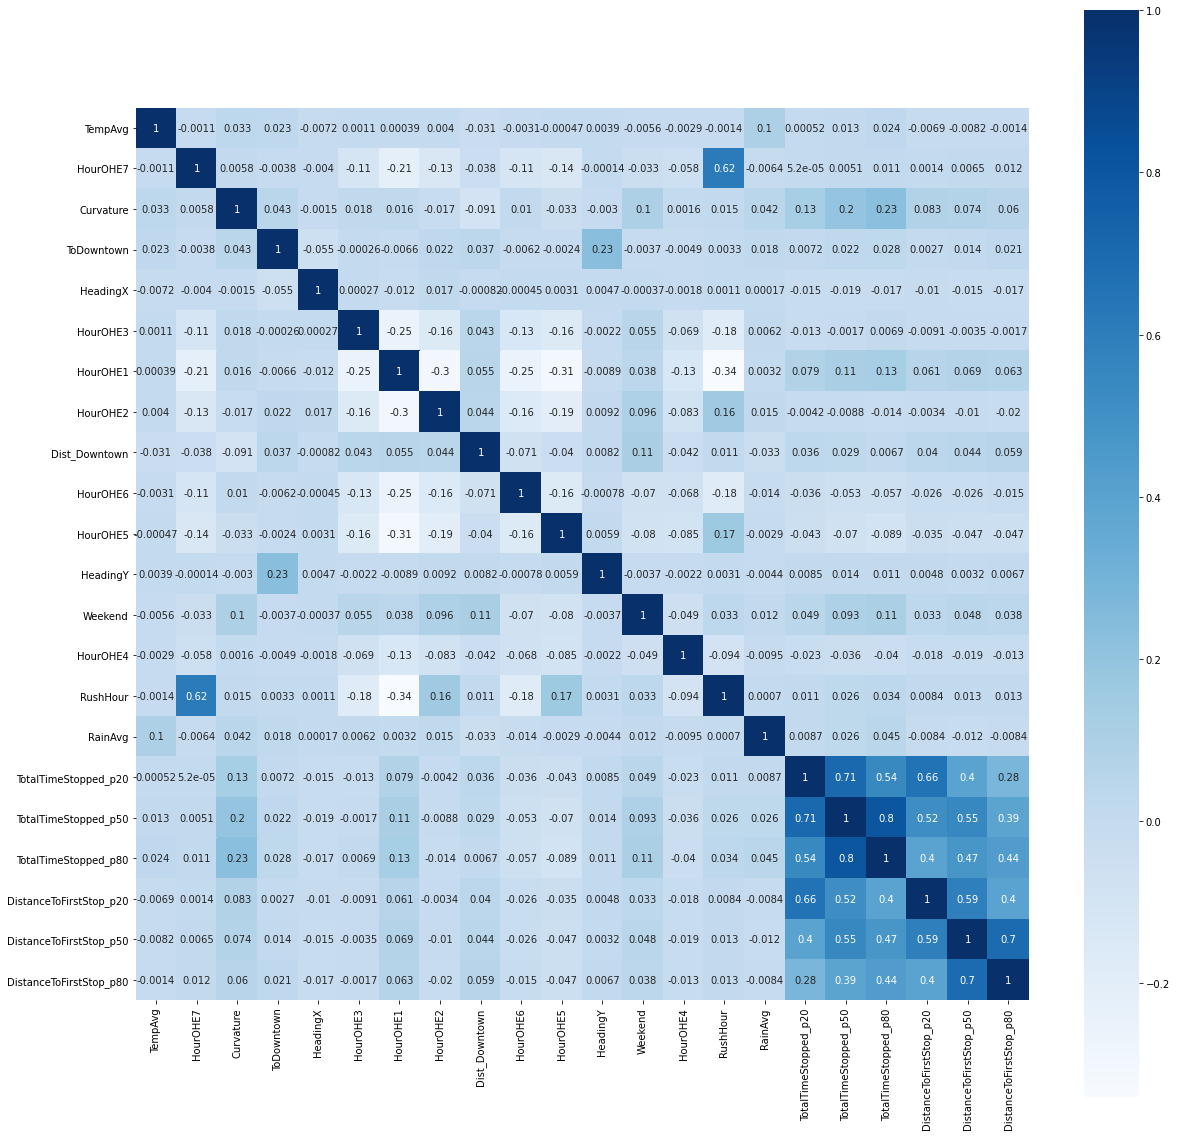

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
targets_plot = targets

dfInteresse = pd.concat([df[features], df[targets_plot]], axis=1)

fig = plt.subplots(figsize=(20,20))
sns.heatmap(dfInteresse.corr(), vmax=1, square=True, annot=True, cmap='Blues')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

train_data['PathOHE'] = encoder.fit_transform(train_data['Path'])
train_data['ExitHeadingOHE']     = encoder.fit_transform(train_data['ExitHeading'])
train_data['EntryHeadingOHE']    = encoder.fit_transform(train_data['EntryHeading'])
train_data['CityOHE']            = encoder.fit_transform(train_data['City'])

test_data['PathOHE'] = encoder.fit_transform(test_data['Path'])
test_data['ExitHeadingOHE']     = encoder.fit_transform(test_data['ExitHeading'])
test_data['EntryHeadingOHE']    = encoder.fit_transform(test_data['EntryHeading'])
test_data['CityOHE']            = encoder.fit_transform(test_data['City'])

# Baseline

In [ ]:
correlation = train_data.corr()

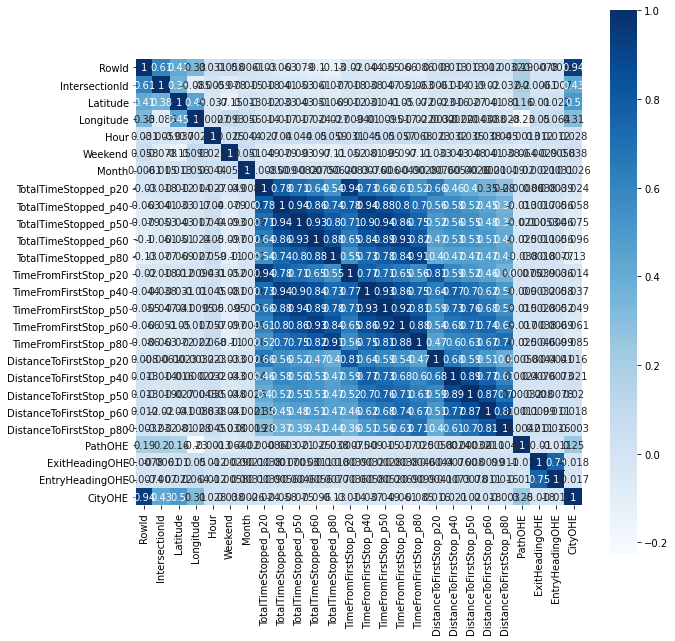

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')
features = ['Latitude', 'Longitude', 'EntryHeadingOHE', 'ExitHeadingOHE', 'CityOHE', 'Hour', 'Weekend', 'Month']
x = train_data[features]
y_time = train_data['TotalTimeStopped_p80']
y_dist = train_data['DistanceToFirstStop_p80']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

(x_train, x_val, y_train, y_val) = train_test_split(x, y_time, test_size = .25)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
predict = regressor.predict(x_val)
accuracy = regressor.score(x_val, y_val)

print("MSE:\t\t", mean_squared_error(y_val, predict))
print("MAE:\t\t", mean_absolute_error(y_val, predict))
print("R2 score:\t",accuracy)

MSE:		 776.146520849298
MAE:		 19.890398134155575
R2 score:	 0.034639873231604335


In [ ]:
(x_train, x_val, y_train, y_val) = train_test_split(x, y_dist, test_size = .25)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
predict = regressor.predict(x_val)
accuracy = regressor.score(x_val, y_val)

print("MSE:\t\t", mean_squared_error(y_val, predict))
print("MAE:\t\t", mean_absolute_error(y_val, predict))
print("R2 score:\t",accuracy)

MSE:		 25387.380184548885
MAE:		 76.23690595793556
R2 score:	 0.013969749149482347


# Modelos

## SVR

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [ ]:
#print(dfInteresse.columns)

###Reduzir Complexidade


####Features Selection

In [ ]:
dfAtlanta = df[df['City'] == 'Atlanta'].drop('City', axis = 1)
dfBoston = df[df['City'] == 'Boston'].drop('City', axis = 1)
dfChicago = df[df['City'] == 'Chicago'].drop('City', axis = 1)
dfPhiladelphia = df[df['City'] == 'Philadelphia'].drop('City', axis = 1)

In [ ]:
cities_list = [[dfAtlanta, 'Atlanta'],
               [dfBoston, 'Boston'],
               [dfChicago, 'Chicago'],
               [dfPhiladelphia ,'Philadelphia']
              ]

###Seleção de Hiperparâmetros

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

kernel_types = ['rbf']
C_range = np.logspace(-2, 10, 2, base=2)
gamma_range = np.logspace(-9, 3, 2, base=2)
epsilon_range = np.logspace(-2, 10, 2, base=2)

k_features = 5 # of features

dfParametersToPredict = pd.DataFrame(columns=['City','Target','Feature1', 'Feature2','GS_BestParameters', 'x_fit_dataset', 'y_fit_dataset', 'model_fit'])

dictMapeamento = {}

count = 0

for t in targets:

  print(t,'\n')

  for city,ref in cities_list:

    exclude_list = list(set(city[targets].columns.to_list()) - set([t])) 

    dfAlvo = city.drop(exclude_list, axis=1)

    # Create and fit selector
    selector = SelectKBest(score_func=f_regression, k=k_features)
    selector.fit(dfAlvo.drop([t], axis = 1), dfAlvo[[t]])
    # Get columns to keep and create new dataframe with those only
    cols = selector.get_support(indices=True)

    features_df_new = dfAlvo.iloc[:,cols]
    featuresSvr = list(features_df_new.columns)
    dfFinal=pd.concat([features_df_new, dfAlvo[[t]]], axis=1)
    
    train_summarized = dfFinal.groupby(featuresSvr, as_index=False)\
                                            .agg({t:[np.mean]})

    print('\t',ref,'\n\t','#Entries:',len(train_summarized),'\n\t','Best',k_features,'Features:',featuresSvr,'\n')

    param_dist = dict(C = C_range, epsilon = epsilon_range, gamma = gamma_range)

    for kernel in kernel_types:
        grid = GridSearchCV(estimator = SVR(kernel = kernel),
                                    param_grid = param_dist,
                                    cv = 3,
                                    n_jobs = -1,
                                    scoring = 'neg_mean_absolute_error')

        grid.fit(train_summarized[featuresSvr], train_summarized[[t]].values.ravel())

        print('\n\t Kernel {} | Parametros: {} | Score: {}'.format(kernel, grid.best_params_, grid.best_score_))

        sv = grid.best_estimator_
        model_fit_variable = sv.fit(train_summarized[featuresSvr], train_summarized[[t]].values.ravel())
        
    dictMapeamento[(ref,t)] = count

    count += 1

    listParameters = [ref, 
                      t, 
                      featuresSvr[0], 
                      featuresSvr[1], 
                      grid.best_params_, 
                      train_summarized[featuresSvr], 
                      train_summarized[[t]].values.ravel(),
                      model_fit_variable]

    dfParametersToPredict.loc[len(dfParametersToPredict)] = listParameters

    print('\n\n')

TotalTimeStopped_p20 

	 Atlanta 
	 #Entries: 10 
	 Best 2 Features: ['HourOHE1', 'Curvature'] 


	 Kernel rbf | Parametros: {'C': 0.25, 'epsilon': 0.25, 'gamma': 0.001953125} | Score: -1.613311222311151



	 Boston 
	 #Entries: 10 
	 Best 2 Features: ['HourOHE1', 'Curvature'] 


	 Kernel rbf | Parametros: {'C': 1024.0, 'epsilon': 0.25, 'gamma': 0.001953125} | Score: -2.3087628991818465



	 Chicago 
	 #Entries: 8 
	 Best 2 Features: ['HourOHE1', 'Curvature'] 


	 Kernel rbf | Parametros: {'C': 1024.0, 'epsilon': 0.25, 'gamma': 0.001953125} | Score: -1.102664023850702



	 Philadelphia 
	 #Entries: 10 
	 Best 2 Features: ['HourOHE1', 'Curvature'] 


	 Kernel rbf | Parametros: {'C': 0.25, 'epsilon': 0.25, 'gamma': 8.0} | Score: -4.176070128613837



TotalTimeStopped_p50 

	 Atlanta 
	 #Entries: 10 
	 Best 2 Features: ['HourOHE1', 'Curvature'] 


	 Kernel rbf | Parametros: {'C': 0.25, 'epsilon': 0.25, 'gamma': 8.0} | Score: -5.05581286263154



	 Boston 
	 #Entries: 10 
	 Best 2 Features

##Predição

In [ ]:
dfParametersToPredict

,City,Target,Feature1,Feature2,GS_BestParameters,x_fit_dataset,y_fit_dataset,model_fit
0,Atlanta,TotalTimeStopped_p20,HourOHE1,Curvature,"{'C': 0.25, 'epsilon': 0.25, 'gamma': 0.001953...",HourOHE1 Curvature 0 ...,"[0.8224978881832118, 1.3611483253588517, 2.804...","SVR(C=0.25, cache_size=200, coef0=0.0, degree=..."
1,Boston,TotalTimeStopped_p20,HourOHE1,Curvature,"{'C': 1024.0, 'epsilon': 0.25, 'gamma': 0.0019...",HourOHE1 Curvature 0 ...,"[0.7360849725437624, 1.820574728968423, 3.2981...","SVR(C=1024.0, cache_size=200, coef0=0.0, degre..."
2,Chicago,TotalTimeStopped_p20,HourOHE1,Curvature,"{'C': 1024.0, 'epsilon': 0.25, 'gamma': 0.0019...",HourOHE1 Curvature 0 ...,"[1.2314286897579967, 3.2494887525562373, 3.564...","SVR(C=1024.0, cache_size=200, coef0=0.0, degre..."
3,Philadelphia,TotalTimeStopped_p20,HourOHE1,Curvature,"{'C': 0.25, 'epsilon': 0.25, 'gamma': 8.0}",HourOHE1 Curvature 0 ...,"[0.8527435147178941, 2.220936328077745, 2.3010...","SVR(C=0.25, cache_size=200, coef0=0.0, degree=..."
4,Atlanta,TotalTimeStopped_p50,HourOHE1,Curvature,"{'C': 0.25, 'epsilon': 0.25, 'gamma': 8.0}",HourOHE1 Curvature 0 ...,"[5.481306510652942, 6.681148325358851, 12.6627...","SVR(C=0.25, cache_size=200, coef0=0.0, degree=..."
5,Boston,TotalTimeStopped_p50,Weekend,Curvature,"{'C': 1024.0, 'epsilon': 0.25, 'gamma': 0.0019...",Weekend Curvature 0 ...,"[3.8594245964746405, 5.2325327510917035, 10.28...","SVR(C=1024.0, cache_size=200, coef0=0.0, degre..."
6,Chicago,TotalTimeStopped_p50,HourOHE1,Curvature,"{'C': 1024.0, 'epsilon': 0.25, 'gamma': 0.0019...",HourOHE1 Curvature 0 ...,"[5.542733685823543, 10.671267893660533, 12.184...","SVR(C=1024.0, cache_size=200, coef0=0.0, degre..."
7,Philadelphia,TotalTimeStopped_p50,HourOHE1,Curvature,"{'C': 0.25, 'epsilon': 0.25, 'gamma': 8.0}",HourOHE1 Curvature 0 ...,"[4.310807597266307, 8.71289164885681, 9.438484...","SVR(C=0.25, cache_size=200, coef0=0.0, degree=..."
8,Atlanta,TotalTimeStopped_p80,HourOHE1,Curvature,"{'C': 0.25, 'epsilon': 0.25, 'gamma': 0.001953...",HourOHE1 Curvature 0 ...,"[20.294981697587836, 22.107942583732058, 34.74...","SVR(C=0.25, cache_size=200, coef0=0.0, degree=..."
9,Boston,TotalTimeStopped_p80,Weekend,Curvature,"{'C': 1024.0, 'epsilon': 0.25, 'gamma': 0.0019...",Weekend Curvature 0 ...,"[15.466265955291416, 19.201783114992722, 29.67...","SVR(C=1024.0, cache_size=200, coef0=0.0, degre..."


In [ ]:
firstId = 0
secondId = 0

for index, row in df_test[:].iterrows():
    
    secondId = 0

    for i in targets:

      city = row['City']

      primeiro_parametro = dfParametersToPredict.loc[(dfParametersToPredict['City'] == city) &
                                                     (dfParametersToPredict['Target'] == i), 'Feature1']
      
      segundo_parametro = dfParametersToPredict.loc[(dfParametersToPredict['City'] == city) &
                                                    (dfParametersToPredict['Target'] == i), 'Feature2']

      feature1, feature2 = (row[primeiro_parametro].values, row[segundo_parametro].values)
      print(city, feature1, feature2)

      iteration_bestEstimator = dfParametersToPredict.loc[(dfParametersToPredict['City'] == city) &
                                                          (dfParametersToPredict['Target'] == i), :]['GS_BestParameters']

      print(primeiro_parametro.values,'\n', segundo_parametro.values)

      sv = SVR(iteration_bestEstimator)

      print('\n',i, city)

      model_fit = dfParametersToPredict.loc[(dfParametersToPredict['City'] == city) &
                                                     (dfParametersToPredict['Target'] == i), :]['model_fit'][dictMapeamento[(city,i)]]

      y_pred = model_fit.predict(pd.concat([row[primeiro_parametro].to_frame().T,row[segundo_parametro].to_frame().T], axis = 1))
      print(y_pred)

      print('{}_{}'.format(firstId,secondId))

      secondId = secondId + 1
      
      print('\n')

    firstId = firstId + 1  

Atlanta [0.0] [0]
['HourOHE1'] 
 ['Curvature']

 TotalTimeStopped_p20 Atlanta
[2.40150084]
0_0


Atlanta [0.0] [0]
['HourOHE1'] 
 ['Curvature']

 TotalTimeStopped_p50 Atlanta
[10.73726576]
0_1


Atlanta [0.0] [0]
['HourOHE1'] 
 ['Curvature']

 TotalTimeStopped_p80 Atlanta
[33.60794257]
0_2


Atlanta [0.0] [0]
['HourOHE1'] 
 ['Curvature']

 DistanceToFirstStop_p20 Atlanta
[3.48788242]
0_3


Atlanta [0.0] [0]
['HourOHE1'] 
 ['Curvature']

 DistanceToFirstStop_p50 Atlanta
[24.50031063]
0_4


Atlanta [0.0] [1.0]
['HourOHE1'] 
 ['HourOHE5']

 DistanceToFirstStop_p80 Atlanta
[96.78429147]
0_5


Atlanta [0.0] [2]
['HourOHE1'] 
 ['Curvature']

 TotalTimeStopped_p20 Atlanta
[2.41126945]
1_0


Atlanta [0.0] [2]
['HourOHE1'] 
 ['Curvature']

 TotalTimeStopped_p50 Atlanta
[11.23751738]
1_1


Atlanta [0.0] [2]
['HourOHE1'] 
 ['Curvature']

 TotalTimeStopped_p80 Atlanta
[33.62345736]
1_2


Atlanta [0.0] [2]
['HourOHE1'] 
 ['Curvature']

 DistanceToFirstStop_p20 Atlanta
[8.41182972]
1_3


Atlanta [0.

#Environment

In [ ]:
drive.flush_and_unmount()